UCB W207 Summer Final Project
Predicting Draft Status Based on NFL Combine Preformance
Section 4 - July 2024

Jenna Farac, Surabhi Gupta, Aditya Kumar, Seema Vora


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./NFL.csv')
data.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


In [3]:
#First we want to check to ensure that there are no duplicates in the player column. 
print(data['Player'].value_counts())
print('We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. ')
data[data['Player'] == 'Chris Jones'] 

Chris Jones                  2
Beanie Wells\WellCh00        1
Sam Swank                    1
Michael Bennett\BennMi99     1
Kahlil Bell\BellKa00         1
                            ..
Alfred Blue\BlueAl00         1
Xavier Su'a-Filo\Sua-Xa00    1
Jeoffrey Pagan\PagaJe00      1
Jadeveon Clowney\ClowJa00    1
Nasir Adderley               1
Name: Player, Length: 3476, dtype: int64
We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. 


,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
3029,2015,Chris Jones,NaN,Alabama,1.7780,82.553811,4.63,82.55,8.0,302.26,6.91,4.19,NaN,26.114013,offense,backs_receivers,WR,No
3347,2018,Chris Jones,NaN,Nebraska,1.8288,88.450512,4.57,NaN,14.0,NaN,NaN,NaN,NaN,26.446483,defense,defensive_back,CB,No


In [4]:
# For our model we will need to convert the drafted values to Binary. 

data['Drafted'] = data['Drafted'].map({'Yes': 1, 'No': 0}).astype('int')
data.head()



,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,1
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,1
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,1
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,1
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,1


In [5]:
nan_counts = data.isna().sum()
nan_counts


Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

In [6]:
data = data.drop(columns=['Agility_3cone', 'Shuttle'])

In [7]:
data.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,1
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,1
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,1
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,1
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,1


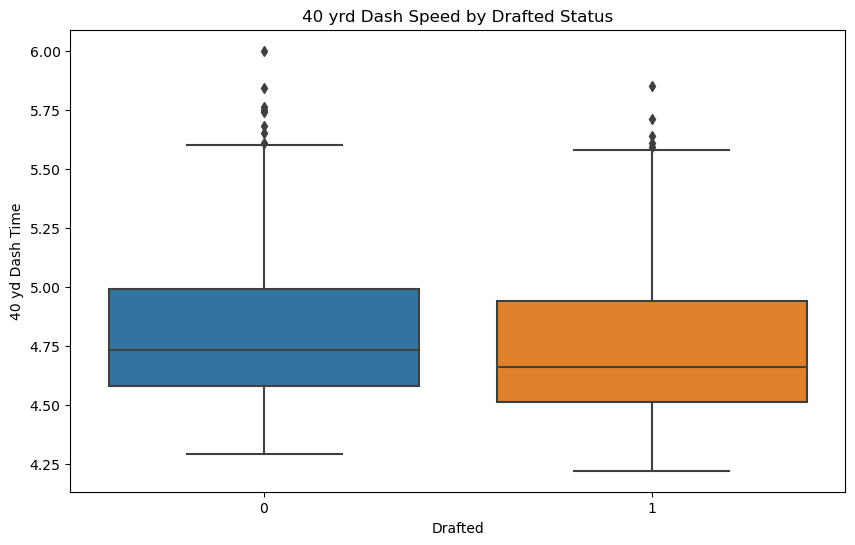

In [15]:
# Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drafted', y='Sprint_40yd', data=data)
plt.title('40 yrd Dash Speed by Drafted Status')
plt.xlabel('Drafted')
plt.ylabel('40 yd Dash Time')
plt.show()


/var/folders/jk/_76h4bpj4jng2rrdlb2nryhc0000gn/T/ipykernel_17013/1705996390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr()


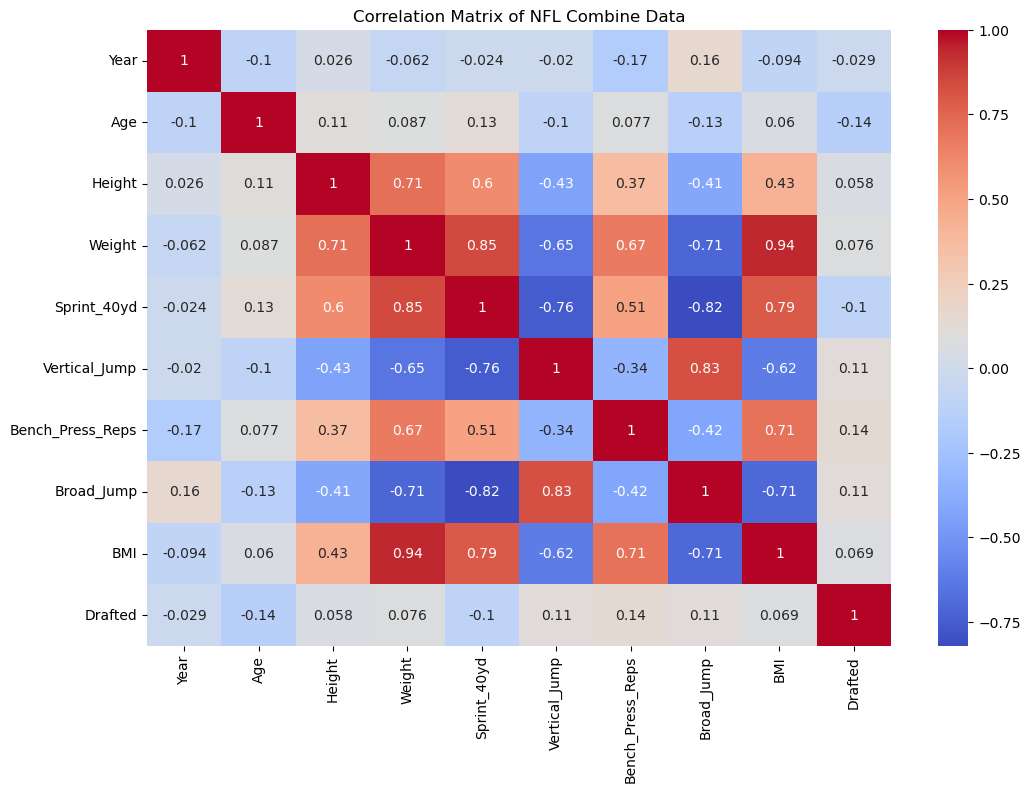

In [13]:
#Correlation matrix
matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of NFL Combine Data')
plt.show()


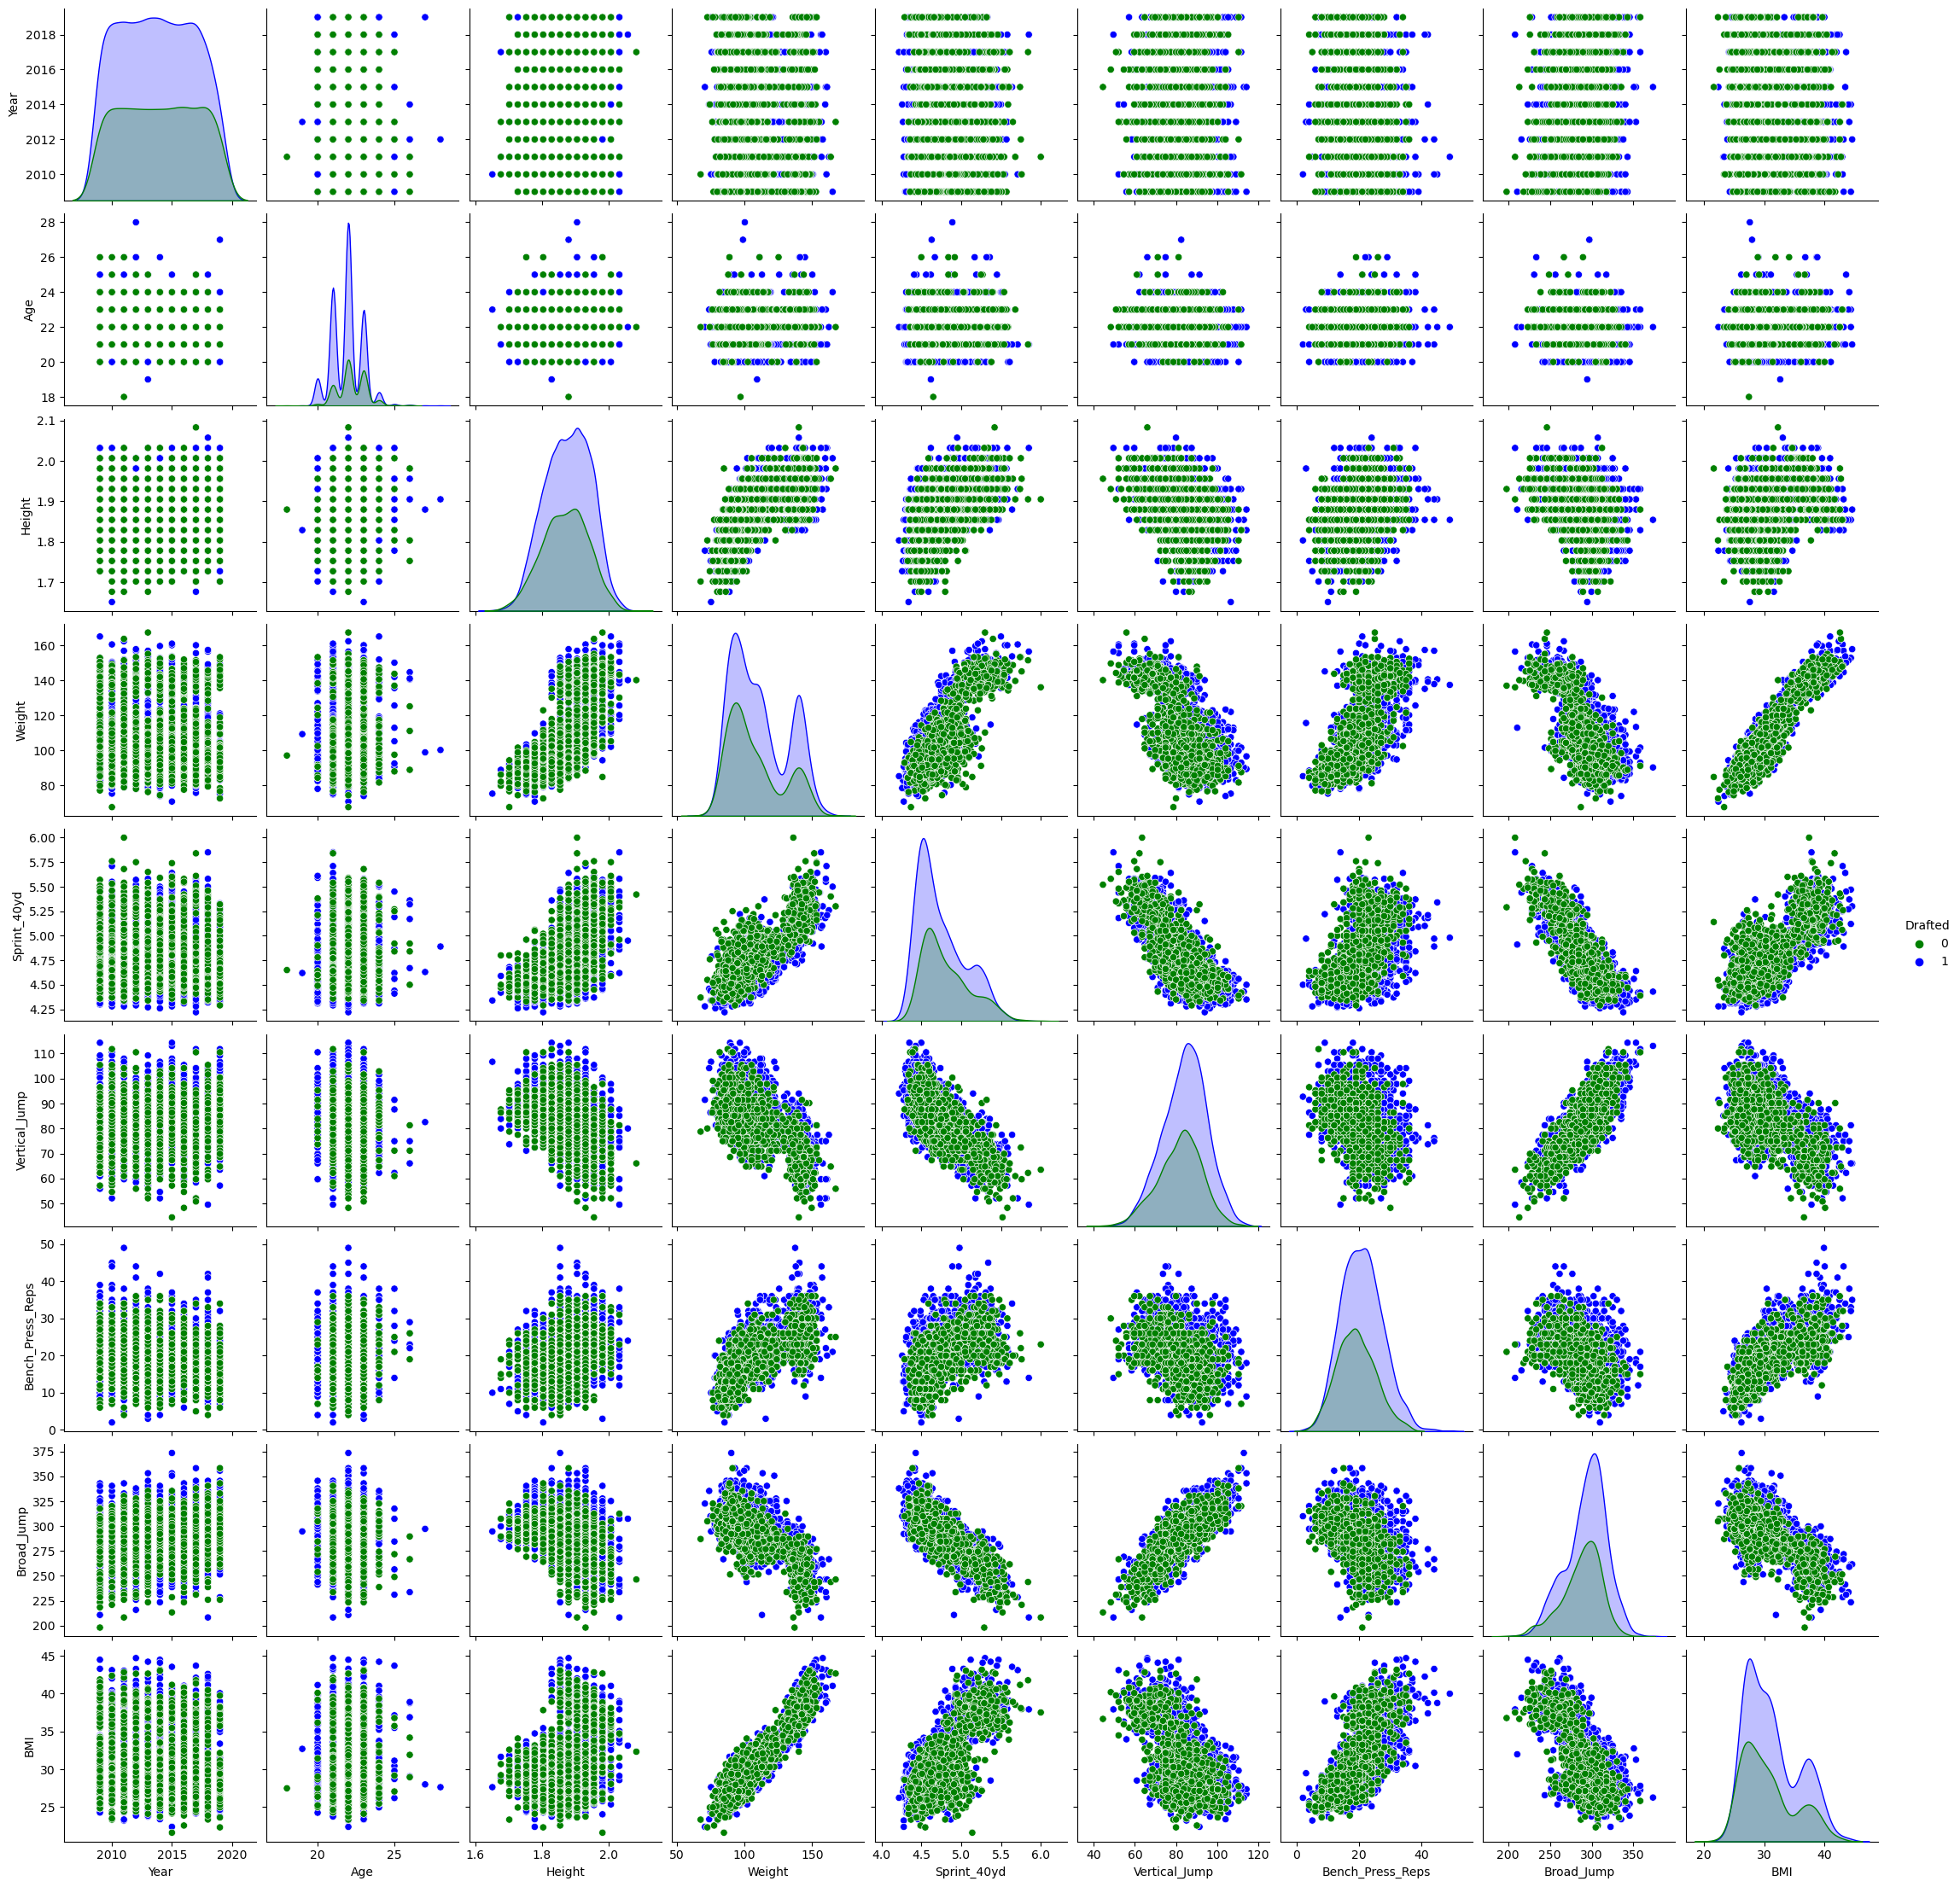

In [22]:
palette = {1:"blue", 0:"green"}
sns.pairplot(data, hue='Drafted', palette=palette)
plt.show()


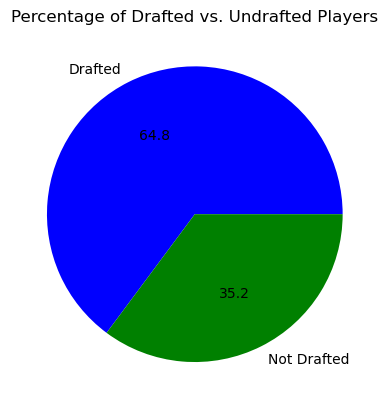

In [31]:
# Looking  at the split in the data between drafted and non drafted
draft_counts = data['Drafted'].value_counts()
labels = ['Drafted', 'Not Drafted']
colors = ['blue', 'green']

plt.pie(draft_counts, labels=labels, colors=colors, autopct='%.1f')
plt.title('Percentage of Drafted vs. Undrafted Players')
plt.show()


In [32]:
#Increasing the number of samples
from sklearn.utils import resample
drafted = data[data['Drafted']==1]
not_drafted = data[data['Drafted']==0]
not_drafted_additional_samples = resample(not_drafted, replace=True, n_samples = len(drafted), random_state = 42)
new_data = pd.concat([drafted, not_drafted_additional_samples])




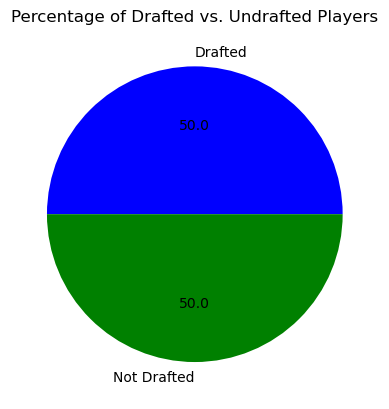

In [34]:
# Looking  at the split in the data between drafted and non drafted (Updated)
draft_counts = new_data['Drafted'].value_counts()
labels = ['Drafted', 'Not Drafted']
colors = ['blue', 'green']

plt.pie(draft_counts, labels=labels, colors=colors, autopct='%.1f')
plt.title('Percentage of Drafted vs. Undrafted Players')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
#split data into x and y

X = new_data.drop(columns=['Drafted'])
y = new_data['Drafted']
#train, val, test  split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state= 42)

print("Training Data Size:", X_train.shape)
print("Validation Data Size:", X_val.shape)
print("Test Data Size:", X_test.shape)

Training Data Size: (2524, 15)
Validation Data Size: (631, 15)
Test Data Size: (1353, 15)
